#**CSS429 - Final Project:** Predicting GDP per capita of countries

**Team-7** - Abraca-data:

*   Muratbekov Maksatbek
*   Sarkulov Yerden
*   Tolbassy Bakdaulet
*   Yegemberdi Nurgeldi
*   Zhakypov Aslan


## Dataset

### Reading dataset

In [120]:
import numpy as np 
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import matplotlib.gridspec as gridspec

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score
from sklearn import metrics
import statsmodels.api as sm

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error


In [121]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [122]:
data = pd.read_csv('/content/drive/MyDrive/Countries of the world.csv')

We will be using the Countries of the World dataset from Kaggle (link:https://www.kaggle.com/fernandol/countries-of-the-world)

Sorry, teacher, for data is old, when we searched data about countries in Kaggle, it was first in the list.


### Dataset Information

**Columns**:

* Country
* Region
* Population
* Area
* Pop. Density (per sq. mi.)
* Coastline (coast/area ratio)

* Net migration
* Infant mortality (per 1000 births)	
* GDP ($ per capita)	
* Literacy (%)	
* Phones (per 1000)	
* Arable (%)	
* Crops (%)	
* Other (%)	
* Climate	
* Birthrate	
* Deathrate	
* Agriculture	
* Industry	
* Service


In [123]:
data.head(5)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22",232,188,579
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61",101,"0,6",298
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


### Data cleaning

In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

We will fix column names

In [125]:
data.columns = (["country","region","population","area","density","coastline_area_ratio","net_migration","infant_mortality","gdp_per_capita",
                  "literacy","phones","arable","crops","other","climate","birthrate","deathrate","agriculture","industry",
                  "service"])

then change an object type to float / category types

In [126]:
data.country = data.country.astype('category')

data.region = data.region.astype('category')

data.density = data.density.astype(str)
data.density = data.density.str.replace(",",".").astype(float)

data.coastline_area_ratio = data.coastline_area_ratio.astype(str)
data.coastline_area_ratio = data.coastline_area_ratio.str.replace(",",".").astype(float)

data.net_migration = data.net_migration.astype(str)
data.net_migration = data.net_migration.str.replace(",",".").astype(float)

data.infant_mortality = data.infant_mortality.astype(str)
data.infant_mortality = data.infant_mortality.str.replace(",",".").astype(float)

data.literacy = data.literacy.astype(str)
data.literacy = data.literacy.str.replace(",",".").astype(float)

data.phones = data.phones.astype(str)
data.phones = data.phones.str.replace(",",".").astype(float)

data.arable = data.arable.astype(str)
data.arable = data.arable.str.replace(",",".").astype(float)

data.crops = data.crops.astype(str)
data.crops = data.crops.str.replace(",",".").astype(float)

data.other = data.other.astype(str)
data.other = data.other.str.replace(",",".").astype(float)

data.climate = data.climate.astype(str)
data.climate = data.climate.str.replace(",",".").astype(float)

data.birthrate = data.birthrate.astype(str)
data.birthrate = data.birthrate.str.replace(",",".").astype(float)

data.deathrate = data.deathrate.astype(str)
data.deathrate = data.deathrate.str.replace(",",".").astype(float)

data.agriculture = data.agriculture.astype(str)
data.agriculture = data.agriculture.str.replace(",",".").astype(float)

data.industry = data.industry.astype(str)
data.industry = data.industry.str.replace(",",".").astype(float)

data.service = data.service.astype(str)
data.service = data.service.str.replace(",",".").astype(float)

In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   country               227 non-null    category
 1   region                227 non-null    category
 2   population            227 non-null    int64   
 3   area                  227 non-null    int64   
 4   density               227 non-null    float64 
 5   coastline_area_ratio  227 non-null    float64 
 6   net_migration         224 non-null    float64 
 7   infant_mortality      224 non-null    float64 
 8   gdp_per_capita        226 non-null    float64 
 9   literacy              209 non-null    float64 
 10  phones                223 non-null    float64 
 11  arable                225 non-null    float64 
 12  crops                 225 non-null    float64 
 13  other                 225 non-null    float64 
 14  climate               205 non-null    float64 
 15  birthr

### Inputting missing data
Finding out which country has a null value for gdp per capita.

In [128]:
data['gdp_per_capita'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
222    False
223     True
224    False
225    False
226    False
Name: gdp_per_capita, Length: 227, dtype: bool

In [129]:
data['country'].iloc[223]

'Western Sahara '

Replacing null value with mean vs median (if not already replaced by 0):

For features in that 0 is unknown role we will replace their nulls with 0.

Using google search, the gdp per capita of Western Sahara is $2500. We will replace the null value with 2500.

Agriculture and service have 15 null values while industry has 16 null values. All belong to very small island nations. Those kind of nations usually have economies that rely heavily on services, with some agricultural and industrial activities. So we will replace the missing values with the following: agriculture = 0.15, industry = 0.05. service = 0.8. For monaco, we will set the value for industry and service to be 0.05 and 0.78 respectively. For Western sahara, we will set the value for agriculture and industry to be 0.35 and 0.25 respectively.

In [130]:
data['net_migration'].fillna(0, inplace=True)
data['infant_mortality'].fillna(0, inplace=True)
data['gdp_per_capita'].fillna(2500, inplace=True)
data['literacy'].fillna(data.groupby('region')['literacy'].transform('median'), inplace= True)
data['phones'].fillna(data.groupby('region')['phones'].transform('median'), inplace= True)
data['arable'].fillna(0, inplace=True)
data['crops'].fillna(0, inplace=True)
data['other'].fillna(0, inplace=True)
data['climate'].fillna(0, inplace=True)
data['birthrate'].fillna(data.groupby('region')['birthrate'].transform('mean'), inplace= True)
data['deathrate'].fillna(data.groupby('region')['deathrate'].transform('median'), inplace= True)
# For monaco
data['industry'][138] = 0.05
data['service'][138] = 0.78
# For western sahara
data['industry'][223] = 0.25
data['agriculture'][223] = 0.35
data['agriculture'].fillna(0.15, inplace=True)
data['service'].fillna(0.8, inplace=True)
data['industry'].fillna(0.05, inplace= True)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning:


A value is tryi

We will check to see that there are no null values

In [131]:
print(data.isnull().sum())

country                 0
region                  0
population              0
area                    0
density                 0
coastline_area_ratio    0
net_migration           0
infant_mortality        0
gdp_per_capita          0
literacy                0
phones                  0
arable                  0
crops                   0
other                   0
climate                 0
birthrate               0
deathrate               0
agriculture             0
industry                0
service                 0
dtype: int64


## Data Visualization

### **Target variable analysis**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_core.py:1303: UserWarning:

Vertical orientation ignored with only `x` specified.



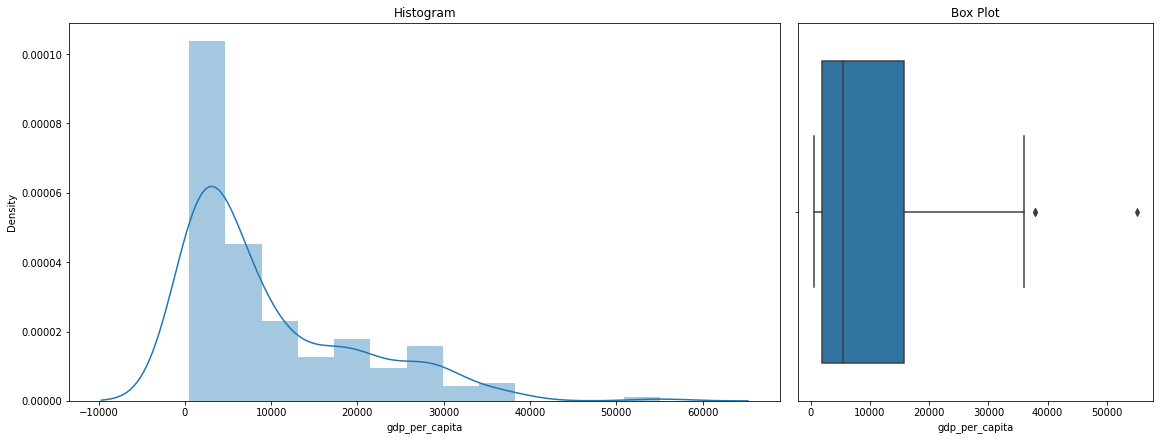

In [132]:
fig = plt.figure(constrained_layout=True, figsize=(16,6))
grid = gridspec.GridSpec(ncols=3, nrows=1, figure=fig)
ax1 = fig.add_subplot(grid[0, :2])
ax1.set_title('Histogram')
sns.distplot(data.loc[:,'gdp_per_capita'], norm_hist=True, ax = ax1)
ax3 = fig.add_subplot(grid[:, 2])
ax3.set_title('Box Plot')
sns.boxplot(data.loc[:,'gdp_per_capita'], orient='v', ax = ax3)
plt.show()

In [133]:
#skewness and kurtosis
print("Skewness: %f" % data['gdp_per_capita'].skew())
print("Kurtosis: %f" % data['gdp_per_capita'].kurt())

Skewness: 1.382162
Kurtosis: 1.571645


* Our target variable, GDP per Capita is not normally distributed.
* Our target variable is right-skewed.
* There are 2 outliers in the variable

### Correlation heatmap

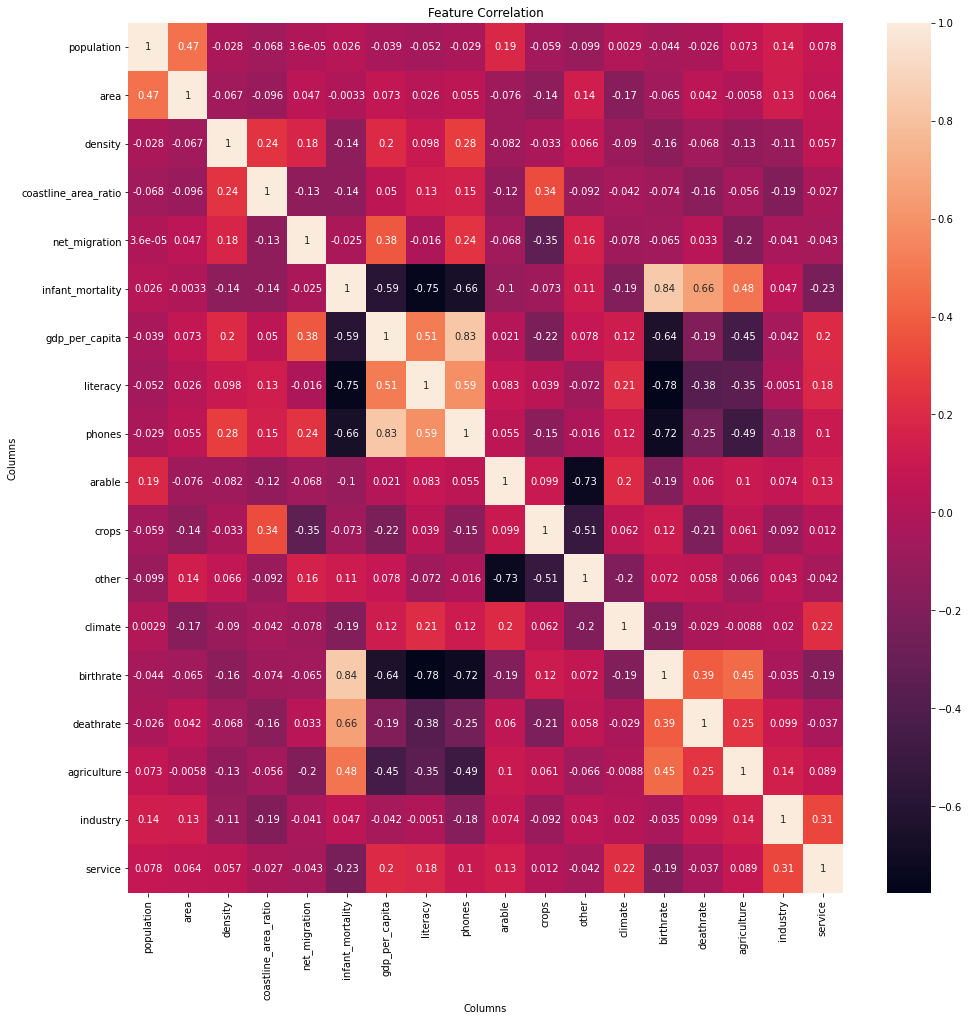

In [134]:
fig, ax = plt.subplots(figsize=(16,16)) 
sns.heatmap(data.corr(), annot=True, ax=ax).set(
    title = 'Feature Correlation', xlabel = 'Columns', ylabel = 'Columns')
plt.show()


Strong correaltion:
* there is a strong positive correlation between gdp per capita and phones (0.83)
* there is a strong positive correlation between infant mortality and birthrate (0.84)
* there is a strong negative correlation between literacy and birthrate (-0.78)
* there is a strong negative correlation between literacy and infant motality (-0.75)
* there is a strong negative correlation between birthrate and phones (-0.72)
* there is a strong negative correlation between other and arable (-0.73)

### GDP 

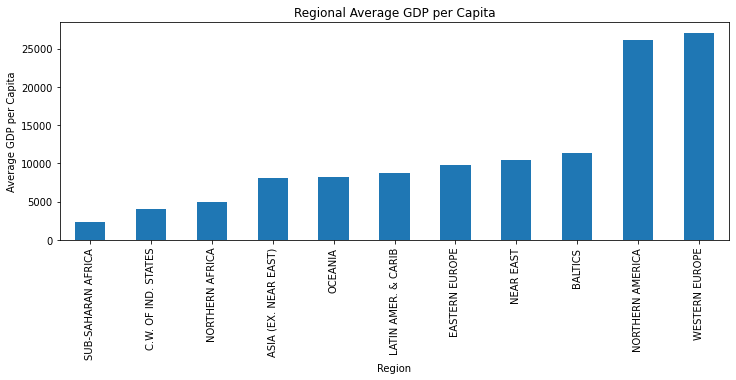

In [135]:
fig = plt.figure(figsize=(12, 4))
data.groupby('region')['gdp_per_capita'].mean().sort_values().plot(kind='bar')
plt.title('Regional Average GDP per Capita')
plt.xlabel("Region")
plt.ylabel('Average GDP per Capita')
plt.show()


As expected, western europe and northern america are the regions that have the highest GDP per capita and on the other hand, sub-saharan africa is the region that has the lowest GDP per capita. The GDP per capita of C.W. OF IND. States is not so good including **our country**.

#### Let's look at the birthrate and deathrate of top 100 countries and last 100 countries interactively.

In [159]:
gdp=data.sort_values(["gdp_per_capita"],ascending=False)

df = gdp.iloc[:100,:]

# Creating trace1
trace1 = go.Scatter(
                    x = df.gdp_per_capita,
                    y = df.birthrate,
                    mode = "lines+markers",
                    name = "Birthrate",
                    marker = dict(color = 'rgba(10,10,180, 0.8)'),
                    text= df.country)
# Creating trace2
trace2 = go.Scatter(
                    x = df.gdp_per_capita,
                    y = df.deathrate,
                    mode = "lines+markers",
                    name = "Deathrate",
                    marker = dict(color = 'rgba(235,66,30, 0.8)'),
                    text= df.country)
z = [trace1, trace2]
layout = dict(title = 'Birthrate and Deathrate of World Countries (Top 100)',
              xaxis= dict(title= 'GDP',ticklen= 5,zeroline= False)
             )
fig = dict(data = z, layout = layout)
iplot(fig)

In [157]:
gdp=data.sort_values(["gdp_per_capita"],ascending=False)

In [160]:
# prepare data frame
df = gdp.iloc[127:227,:]

# Creating trace1
trace1 = go.Scatter(
                    x = df.gdp_per_capita,
                    y = df.birthrate,
                    mode = "lines+markers",
                    name = "Birthrate",
                    marker = dict(color = 'rgba(10,10,180, 0.8)'),
                    text= df.country)
# Creating trace2
trace2 = go.Scatter(
                    x = df.gdp_per_capita,
                    y = df.deathrate,
                    mode = "lines+markers",
                    name = "Deathrate",
                    marker = dict(color = 'rgba(235,66,30, 0.8)'),
                    text= df.country)
z = [trace1, trace2]
layout = dict(title = 'Birthrate and Deathrate Percentage of World Countries (Last 100)',
              xaxis= dict(title= 'GDP',ticklen= 5,zeroline= False)
             )
fig = dict(data = z, layout = layout)
iplot(fig)

As predicted, when GDP decreases, both Birthrate and death rate increases. 

#### Let's look at percentage of agriculture , industry and service of top 100 and last 100 countries interactively

In [161]:
df = gdp.iloc[:100,:]

# Creating trace1
trace1 = go.Scatter(
                    x = df.gdp_per_capita,
                    y = df.agriculture,
                    mode = "lines+markers",
                    name = "AGRICULTURE",
                    marker = dict(color = 'rgba(235,66,30, 0.8)'),
                    text= df.country)
# Creating trace2
trace2 = go.Scatter(
                    x = df.gdp_per_capita,
                    y = df.industry,
                    mode = "lines+markers",
                    name = "INDUSTRY",
                    marker = dict(color = 'rgba(10,10,180, 0.8)'),
                    text= df.country)
# Creating trace3
trace3 = go.Scatter(
                    x = df.gdp_per_capita,
                    y = df.service,
                    mode = "lines+markers",
                    name = "SERVICE",
                    marker = dict(color = 'rgba(10,250,60, 0.8)'),
                    text= df.country)


z = [trace1, trace2,trace3]
layout = dict(title = 'Service , Industry and Agriculture Percentage of World Countries (TOP 100)',
              xaxis= dict(title= 'GDP',ticklen= 5,zeroline= False)
             )
fig = dict(data = z, layout = layout)
iplot(fig)

In [162]:
# prepare data frame
df = gdp.iloc[127:227,:]

# Creating trace1
trace1 = go.Scatter(
                    x = df.gdp_per_capita,
                    y = df.agriculture,
                    mode = "lines+markers",
                    name = "AGRICULTURE",
                    marker = dict(color = 'rgba(235,66,30, 0.8)'),
                    text= df.country)
# Creating trace2
trace2 = go.Scatter(
                    x = df.gdp_per_capita,
                    y = df.industry,
                    mode = "lines+markers",
                    name = "INDUSTRY",
                    marker = dict(color = 'rgba(10,10,180, 0.8)'),
                    text= df.country)
# Creating trace3
trace3 = go.Scatter(
                    x = df.gdp_per_capita,
                    y = df.service,
                    mode = "lines+markers",
                    name = "SERVICE",
                    marker = dict(color = 'rgba(10,250,60, 0.8)'),
                    text= df.country)


z = [trace1, trace2,trace3]
layout = dict(title = 'Service , Industry and Agriculture Percentage of World Countries (LAST 100)',
              xaxis= dict(title= 'GDP',ticklen= 5,zeroline= False)
             )
fig = dict(data = z, layout = layout)
iplot(fig)

The top 100 countries have a very high service percentage (averaged at around 70%) and a very low agriculture percentage (averaged at around 3%) whereas the bottom 100 countries have a lower service percentage, in relation with the top 100 countries (averaged at around 43%) and a higher agriculture percentage (averaged at around 22%).

#### Look at the birthrate and deathrate of of CIS

In [163]:
gdp=data.sort_values(["gdp_per_capita"],ascending=True)

df = gdp.loc[data['region'] == 'C.W. OF IND. STATES' ]

# Creating trace1
trace1 = go.Scatter(
                    x = df.country,
                    y = df.birthrate,
                    mode = "lines+markers",
                    name = "Birthrate",
                    marker = dict(color = 'rgba(10,10,180, 0.8)', size = 30),
                    text= df.gdp_per_capita)
# Creating trace2
trace2 = go.Scatter(
                    x = df.country,
                    y = df.deathrate,
                    mode = "lines+markers",
                    name = "Deathrate",
                    marker = dict(color = 'rgba(235,66,30, 0.8)', size = 30),
                    text= df.gdp_per_capita)
z = [trace1, trace2]
layout = dict(title = 'Birthrate and Deathrate of CIS',
              xaxis= dict(title= 'Countries',ticklen= 5,zeroline= False)
             )
fig = dict(data = z, layout = layout)
iplot(fig)

#### Then let's look at percentage of agriculture , industry and service of CIS

In [164]:
gdp=data.sort_values(["gdp_per_capita"],ascending=True)

df = gdp.loc[data['region'] == 'C.W. OF IND. STATES' ]

# Creating trace1
trace1 = go.Scatter(
                    x = df.country,
                    y = df.agriculture,
                    mode = "lines+markers",
                    name = "AGRICULTURE",
                    marker = dict(color = 'rgba(235,66,30, 3)', size = 30),
                    text= df.gdp_per_capita)
# Creating trace2
trace2 = go.Scatter(
                    x = df.country,
                    y = df.industry,
                    mode = "lines+markers",
                    name = "INDUSTRY",
                    marker = dict(color = 'rgba(10,10,180, 3)', size = 30),
                    text= df.gdp_per_capita)
# Creating trace3
trace3 = go.Scatter(
                    x = df.country,
                    y = df.service,
                    mode = "lines+markers",
                    name = "SERVICE",
                    marker = dict(color = 'rgba(10,250,60, 3)', size = 30),
                    text= df.gdp_per_capita)


z = [trace1, trace2,trace3]
layout = dict(title = 'Service , Industry and Agriculture Percentage of CIS',
              xaxis= dict(title= 'Countries',ticklen= 5,zeroline= False)
             )
fig = dict(data = z, layout = layout)
iplot(fig)

### Regional analysis

C. W. OF IND. States includes Kazakhstan

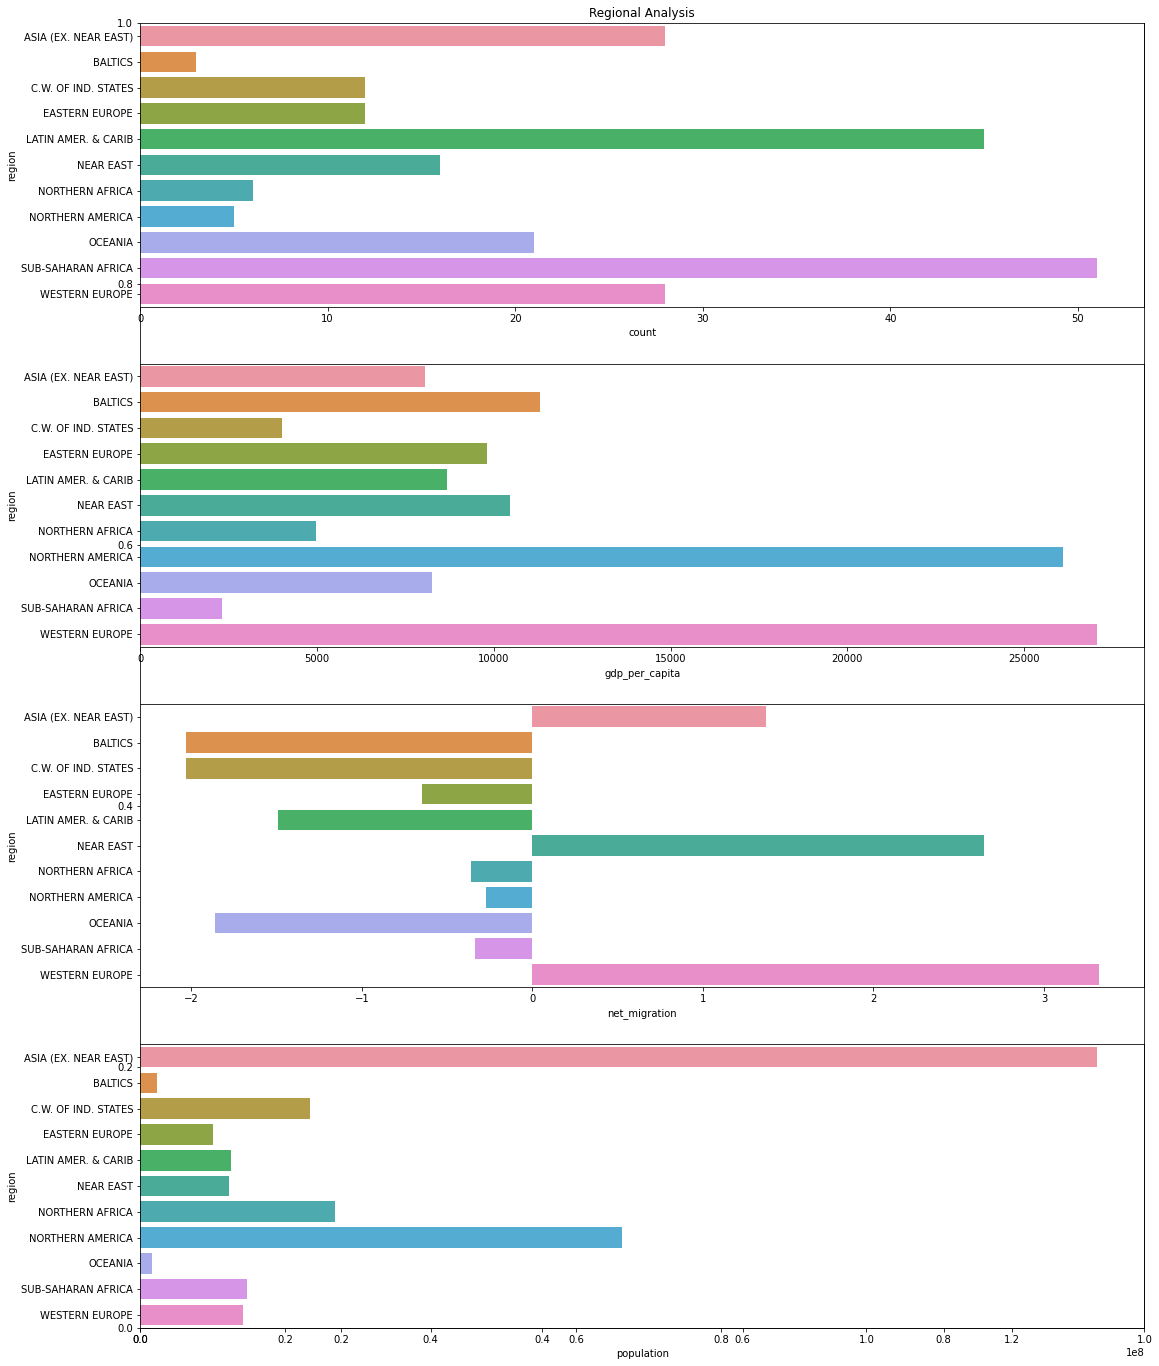

In [143]:
fig = plt.figure(figsize=(18, 24))
plt.title('Regional Analysis')
ax1 = fig.add_subplot(4, 1, 1)
ax2 = fig.add_subplot(4, 1, 2)
ax3 = fig.add_subplot(4, 1, 3)
ax4 = fig.add_subplot(4, 1, 4)
sns.countplot(data= data, y= 'region', ax= ax1)
sns.barplot(data= data, y= 'region', x= 'gdp_per_capita', ax= ax2, ci= None)
sns.barplot(data= data, y= 'region', x= 'net_migration', ax= ax3, ci= None)
sns.barplot(data= data, y= 'region', x= 'population', ax= ax4, ci= None)
plt.show()

* Sub-Saharian Africa and Latin America regions have the most countries
* Western Europe and North America have the highest GDP per capita, while Sub-Saharian Africa has the lowest GDP per capita.
* There is too many people that are moving to another regions in C. W. OF IND. States that includes **Kazakhstan**.
* Asia has the largest population, Oceania has the smallest.

## Data Preperation



### Transform region column

Transform `region` column into numerical values.

In [144]:
data_final = pd.concat([data,pd.get_dummies(data['region'], prefix='region')], axis=1)
#dropping the redundant region column
data_final.drop(['region'],axis=1,inplace=True)
print(data_final.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   country                      227 non-null    category
 1   population                   227 non-null    int64   
 2   area                         227 non-null    int64   
 3   density                      227 non-null    float64 
 4   coastline_area_ratio         227 non-null    float64 
 5   net_migration                227 non-null    float64 
 6   infant_mortality             227 non-null    float64 
 7   gdp_per_capita               227 non-null    float64 
 8   literacy                     227 non-null    float64 
 9   phones                       227 non-null    float64 
 10  arable                       227 non-null    float64 
 11  crops                        227 non-null    float64 
 12  other                        227 non-null    float64 
 13  clima

In [145]:
data_final.head(5)

,country,population,area,density,coastline_area_ratio,net_migration,infant_mortality,gdp_per_capita,literacy,phones,arable,crops,other,climate,birthrate,deathrate,agriculture,industry,service,region_ASIA (EX. NEAR EAST),region_BALTICS,region_C.W. OF IND. STATES,region_EASTERN EUROPE,region_LATIN AMER. & CARIB,region_NEAR EAST,region_NORTHERN AFRICA,region_NORTHERN AMERICA,region_OCEANIA,region_SUB-SAHARAN AFRICA,region_WESTERN EUROPE
0,Afghanistan,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.38,0.24,0.38,1,0,0,0,0,0,0,0,0,0,0
1,Albania,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,232.00,188.00,579.00,0,0,0,1,0,0,0,0,0,0,0
2,Algeria,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,101.00,0.60,298.00,0,0,0,0,0,0,1,0,0,0,0
3,American Samoa,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,0.15,0.05,0.80,0,0,0,0,0,0,0,0,1,0,0
4,Andorra,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,0.15,0.05,0.80,0,0,0,0,0,0,0,0,0,0,1


### **Model 1** (all features)

We will try different splits of our dataset (with/without feature selection, with/without feature scaling.

In [146]:
y = data_final['gdp_per_capita']
X = data_final.drop(['gdp_per_capita','country'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### **Model 2** (selected features)

We will select only columns with correlation score larger than -/+ 0.3 with gdp_per_capita.

In [147]:
y2 = y
X2 = data_final.drop(['gdp_per_capita','country','population', 'area', 'coastline_area_ratio', 'arable',
                      'crops', 'other', 'climate', 'deathrate', 'industry'], axis=1)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=101)

## Model building and evaluating



### Linear Regression

In [148]:
lm1 = LinearRegression()
lm1.fit(X_train,y_train)

lm2 = LinearRegression()
lm2.fit(X2_train,y2_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [149]:
lm1_pred = lm1.predict(X_test)
lm2_pred = lm2.predict(X2_test)

In [150]:
print('Linear Regression Performance:')

print('\nwith all features:')
print('MAE:', mean_absolute_error(y_test, lm1_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, lm1_pred)))
print('R2_Score: ', r2_score(y_test, lm1_pred))

print('\nwith selected features:')
print('MAE:', mean_absolute_error(y2_test, lm2_pred))
print('RMSE:', np.sqrt(mean_squared_error(y2_test, lm2_pred)))
print('R2_Score: ', r2_score(y2_test, lm2_pred))


Linear Regression Performance:

with all features:
MAE: 373268.60793178563
RMSE: 1776237.7539696244
R2_Score:  -38182.43082897876

with selected features:
MAE: 2921.00540806377
RMSE: 4143.149069688224
R2_Score:  0.7922534247797287


As you see, y2 which uses feature selection has higher R^2 score. We will set R^2 score = 0.79 as the benchmark that will be compared when building other models.

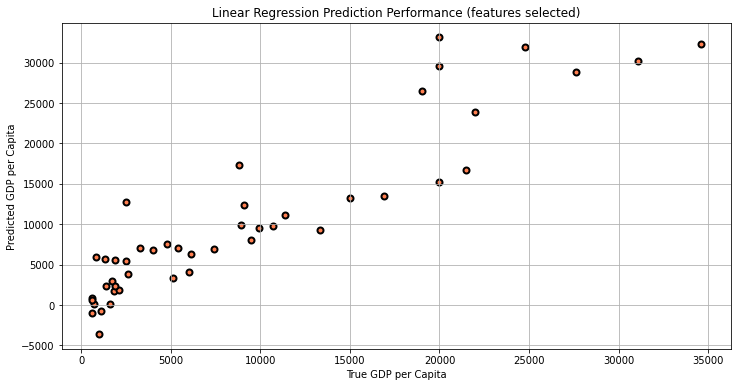

In [151]:
fig = plt.figure(figsize=(12, 6))
plt.scatter(y2_test,lm2_pred,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predicted GDP per Capita') 
plt.title('Linear Regression Prediction Performance (features selected)') 
plt.grid()
plt.show()

### Lasso Regression:



In [152]:
print("Lasso Regression performance")
model_lasso = Lasso(alpha=0.01,tol=0.01)
model_lasso.fit(X2_train,y2_train) 
pred_test_lasso= model_lasso.predict(X2_test)
print('MAE:', mean_absolute_error(y2_test,pred_test_lasso))
print('RMSE:', np.sqrt(mean_squared_error(y2_test,pred_test_lasso)))
print('R2_Score: ', r2_score(y2_test,pred_test_lasso))

Lasso Regression performance
MAE: 2921.0276000001822
RMSE: 4143.17544919213
R2_Score:  0.7922507793190192


### Random Forest


We tried to use Random Forest and It has the highest accuracy

In [153]:
rf1 = RandomForestRegressor(random_state=101, n_estimators=200)
rf2 = RandomForestRegressor(random_state=101, n_estimators=200)

rf1.fit(X_train, y_train)
rf2.fit(X2_train, y2_train)
rf1_pred = rf1.predict(X_test)
rf2_pred = rf2.predict(X2_test)

Random Forest Performance:

with all features
MAE: 2529.141304347826
RMSE: 3732.061477923428
R2_Score:  0.8314338636336989

with selected features
MAE: 2763.391304347826
RMSE: 4026.1710718746167
R2_Score:  0.8038188832529698


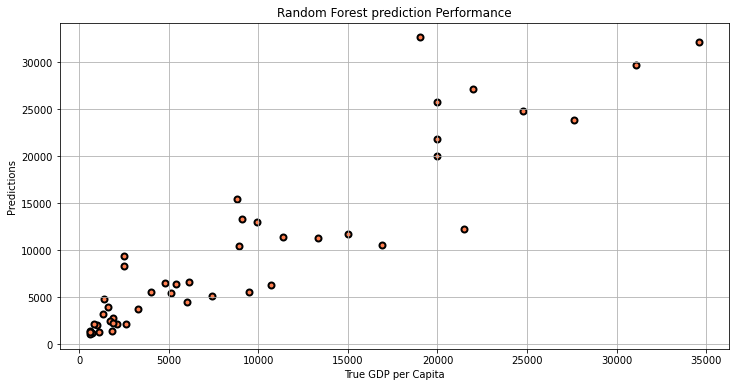

In [154]:
print('Random Forest Performance:')

print('\nwith all features')
print('MAE:', metrics.mean_absolute_error(y_test, rf1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf1_pred)))
print('R2_Score: ', metrics.r2_score(y_test, rf1_pred))

print('\nwith selected features')
print('MAE:', metrics.mean_absolute_error(y2_test, rf2_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, rf2_pred)))
print('R2_Score: ', metrics.r2_score(y2_test, rf2_pred))

fig = plt.figure(figsize=(12, 6))
plt.scatter(y_test,rf1_pred,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('Random Forest prediction Performance') 
plt.grid()
plt.show()

Random forest performed better than linear regression. Random forest using all features performed significantly better than using selected features.

### Predicting GDP of Kazakhstan

True GDP per capita of Kazakhstan is 6300$

In [155]:
X_Kazakhstan = X.iloc[106:107]
X2_Kazakhstan = X2.iloc[106:107]


rf1_pred = rf1.predict(X_Kazakhstan)
rf2_pred = rf2.predict(X2_Kazakhstan)

print('Random Forest with all features: ', rf1_pred)
print('Random Forest with selected features: ', rf2_pred)

lm2_pred = lm2.predict(X2_Kazakhstan)
model_lasso_pred = model_lasso.predict(X2_Kazakhstan)

print('Linear with selected features: ', lm2_pred)
print('Lasso with selected features: ', model_lasso_pred)

Random Forest with all features:  [6466.]
Random Forest with selected features:  [6185.]
Linear with selected features:  [4491.5277995]
Lasso with selected features:  [4491.58048237]


WoW, as predicted **Random Forest** was the best predictor. However, **Linear and Lasso** didn't even give *6000* for our country.

### Conclusion:

We used 3 different learning regressors (Linear and Lasso Regression, Random Forest) to predict the GDP per capita of countries.

Random Forest performed the best performance.

1) **Random Forest Regressor**, using all features in the dataset, and resulted in the following metrics:

* Mean Absolute Error (MAE): 2529.14
* Root mean squared error (RMSE): 3732.06
* R-squared Score (R2_Score): 0.83

2) **Linear and Lasso Regression** indicated almost the same results with 0.79 R-squared Score.


Taking into account that the the GDP per capita of **Kazakhstan** is predicted as 6466$ by the best regressor which used all features of Countries of the World dataset.